# Entregable 2 - Trabajo 2

**CODIGO DE PREPROCESAMIENTO DEL DATASET**

In [1]:
!pip install -U -q PyDrive 
  
from pydrive.auth import GoogleAuth 
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials 
  
  
# Authenticate and create the PyDrive client. 
auth.authenticate_user() 
gauth = GoogleAuth() 
gauth.credentials = GoogleCredentials.get_application_default() 
drive = GoogleDrive(gauth)

link = 'https://drive.google.com/file/d/1zO8OQFruiOW_crtJWeyNpsUFv1x0IqVp/view?usp=sharing'
  
import pandas as pd 
  
# to get the id part of the file 
id = link.split("/")[-2] 
  
downloaded = drive.CreateFile({'id':id})  
downloaded.GetContentFile('train_fixed.csv')   
  
df_train = pd.read_csv('train_fixed.csv') 

link = 'https://drive.google.com/file/d/1puIY2UlO7_wiynypBJUA4RDEdckN3yTS/view?usp=sharing'
  
# to get the id part of the file 
id = link.split("/")[-2] 
  
downloaded = drive.CreateFile({'id':id})  
downloaded.GetContentFile('test_fixed.csv')   
  
df_test = pd.read_csv('test_fixed.csv') 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import joblib
from sklearn.utils import resample

In [24]:
pd.set_option('display.max_columns', None)

In [3]:
pd.options.display.max_columns = None

In [4]:
df_train.head(5)

,periodo,per12,pagare,codcli,corper,producto,sub_producto,default12,descre,tipcre,grupo,sector,cladeu,cladeumax3,cladeumax6,cladeumax12,cladeumat,cladeumatmax3,cladeumatmax6,cladeumatmax12,saldo,saldoprom3,saldomax3,montodes,saldorcc,saldoprom6,saldoprom12,saldomax6,saldomax12,condiaprom6,condiaprom12,condiamatprom3,condiamatprom6,condiamatprom12,saldo103prom3,saldo103prom6,saldo103prom12,nentdir,nentdirprom3,nentdirprom6,nentdirprom12,nentdirmax3,nentdirmax6,nentdirmax12,porsaldopyme,saldopymeprom3,saldopymeprom6,saldopymeprom12,dctmg00,dctmg01,dctmg02,dctmg03,dctmg04,dctmg05,varsldo3,varsldo6,varsldo12,varpdm3,varpdm6,varpdm12,varnent3,varnent6,varnent12,varpyme3,varpyme6,varpyme12,v1_ventas_al_contado,v999_ventas_netas,v4_mercaderias_insumos_y_servicio,v999_costo_de_ventas,v9_gastos_de_ventas,v10_gastos_generales_y_administrativos,v100_total_gastos_de_operacion,v120_gastos_generales_y_administrativos,v18_gastos_financieros,v101_utilidad_bruta,v102_utilidad_operativo,v103_utilidad_perdida_antes_de_impuestos,v105_utilidad_perdida_neta,v106_liquidez_disponible,v107_utilidad_del_negocio,v900_liquidez_corriente,v901_activos_relacion_acida,v902_pasivos_relacion_acida,v903_total_activos,v904_total_pasivos,v905_tot_pasivos_gananec_diferidas_pat_neto,v906_activo_fijo,v911_relacion_acida,v914_rotacion_de_inventarios,v915_dias_de_inventario,v917_ciclo_financiero,v920_relacion_de_ventas_y_activo_fijo,v921_capital_de_trabajo,v922_rotacion_de_kw_bruto,v923_rotacion_patrimonial,v901_grado_de_patrimonio,v902_endeudamiento_patrimonial,v902_gastos_operativos,v905_rentabilidad_de_ventas,v901_apalancamiento,v903_pasivos_cp_tot_pasivos_patrimonio,v905_patrimonio_tot_pasivo_patrimonio,v901_activo_fijo_patrimonio,v1_otros_ingresos_familiares,v999_total_ingresos,v110_utilidad_del_negocio,v3_servicios_luz,v4_servicios_agua,v998_total_consumo_familiar,v999_total_egresos_uef,v999_liquidez_disponible,v100_caja_y_bancos,v101_caja,v120_clientes,v121_facturas_por_cobrar,v160_cuentas_por_cobrar_diversas,v168_otras_cuentas_por_cobrar_diversas,v200_inventarios,v201_mercaderia,v212_otros_activos_corrientes,v330_inmuebles_maquinaria_y_equipo,v451_deudas_a_largo_plazo,v500_capital,v501_capital_personal,v599_utilidad_perdida_neta,v999_total_activos_corrientes,v999_total_activos_no_corrientes,v999_total_pasivos_corrientes,v999_total_pasivos_no_corrientes,v4_mercaderias_insumos_y_servicio_999_ventas_netas,v999_costo_de_ventas_999_ventas_netas,v100_total_gastos_de_operacion_999_ventas_netas,v110_gastos_de_ventas_999_ventas_netas,v120_gastos_generales_y_administrativos_999_ventas_netas,v200_inventarios_903_total_activos,v106_liquidez_disponible_999_total_patrimonio_neto,v106_liquidez_disponible_903_total_activos,v100_caja_y_bancos_903_total_activos,v451_deudas_a_largo_plazo__999_total_pasivos_corrientes_999_total_pasivos_no_corrientes,v906_activo_fijo_903_total_activos,v999_total_activos_corrientes_903_total_activos,v999_total_activos_no_corrientes_903_total_activos,v904_total_pasivos_999_total_patrimonio_neto,v107_utilidad_del_negocio_999_ventas_netas,v107_utilidad_del_negocio_999_total_patrimonio_neto,v330_inmuebles_maquinaria_y_equipo_903_total_activos,v451_deudas_a_largo_plazo_999_total_patrimonio_neto,v998_total_consumo_familiar_999_ventas_netas,clasoc,concred_cladef,genero,tipovi,estadciv,ubidepa,sectec,niveduc,ocupa,produc,his_saldo,edad,saldobd1,plazobd1,tasa,couta,monga,his_saldo_prom_03meses,his_saldo_prom_06meses,his_saldo_prom_12meses,his_saldo_max_03meses,his_saldo_max_06meses,his_saldo_max_12meses,his_saldo_var_03meses,his_saldo_var_06meses,his_saldo_var_12meses,his_ant_tot_cred,saldo_cuenta,total_saldo_cuenta,promedio_sal_m03,promedio_sal_m06,promedio_sal_m12,saldo_maximo_m03,saldo_maximo_m06,saldo_maximo_m12,antig_depos_vigen,antig_total_depos,antig_tot_cred_dep,suma_total_deposi,concred_claint,segdesgra,segtodoriesgo,segvida,provision,concred_tasade,rentabilidad,fechavista
0,201603,24195,0,0,1373,80,0,0,3,9,1,3,1,1,1,1,1,1,1,1,10000.0,46706.0198,85

In [135]:
names = df_train.columns.values 
names

array(['periodo', 'per12', 'pagare', 'codcli', 'corper', 'producto',
       'sub_producto', 'default12', 'descre', 'tipcre', 'grupo', 'sector',
       'cladeu', 'cladeumax3', 'cladeumax6', 'cladeumax12', 'cladeumat',
       'cladeumatmax3', 'cladeumatmax6', 'cladeumatmax12', 'saldo',
       'saldoprom3', 'saldomax3', 'montodes', 'saldorcc', 'saldoprom6',
       'saldoprom12', 'saldomax6', 'saldomax12', 'condiaprom6',
       'condiaprom12', 'condiamatprom3', 'condiamatprom6',
       'condiamatprom12', 'saldo103prom3', 'saldo103prom6',
       'saldo103prom12', 'nentdir', 'nentdirprom3', 'nentdirprom6',
       'nentdirprom12', 'nentdirmax3', 'nentdirmax6', 'nentdirmax12',
       'porsaldopyme', 'saldopymeprom3', 'saldopymeprom6',
       'saldopymeprom12', 'dctmg00', 'dctmg01', 'dctmg02', 'dctmg03',
       'dctmg04', 'dctmg05', 'varsldo3', 'varsldo6', 'varsldo12',
       'varpdm3', 'varpdm6', 'varpdm12', 'varnent3', 'varnent6',
       'varnent12', 'varpyme3', 'varpyme6', 'varpyme12',
     

In [5]:
columns = ['saldo','saldoprom3','saldomax3','saldorcc','nentdir','varsldo3','v999_ventas_netas',
           'edad','genero','tipovi','estadciv','ubidepa','plazobd1','his_saldo_prom_03meses',
           'v107_utilidad_del_negocio','v106_liquidez_disponible_999_total_patrimonio_neto',
           'v500_capital','v100_caja_y_bancos','his_ant_tot_cred',
           'v107_utilidad_del_negocio_999_total_patrimonio_neto','default12']

Data_Seleccionada = pd.DataFrame(df_train, columns=columns)

In [6]:
Data_Seleccionada.isnull().sum(axis = 0)

saldo                                                       0
saldoprom3                                              84605
saldomax3                                               84605
saldorcc                                                84605
nentdir                                                 84605
varsldo3                                                89873
v999_ventas_netas                                        9166
edad                                                        0
genero                                                  11699
tipovi                                                      0
estadciv                                                    0
ubidepa                                                     0
plazobd1                                                    0
his_saldo_prom_03meses                                 219469
v107_utilidad_del_negocio                                9164
v106_liquidez_disponible_999_total_patrimonio_neto       9303
v500_cap

In [7]:
Data_Seleccionada.genero.value_counts()

0.0    320395
1.0    251519
Name: genero, dtype: int64

In [8]:
mask = Data_Seleccionada['genero'].isna() 
ind = Data_Seleccionada['genero'].loc[mask].sample(frac=(Data_Seleccionada.genero.value_counts(0)[1]/(Data_Seleccionada.genero.value_counts(0)[1]+Data_Seleccionada.genero.value_counts(0)[0]))).index
Data_Seleccionada.loc[ind, 'genero'] = 1
Data_Seleccionada['genero'] = Data_Seleccionada['genero'].fillna(0)
Data_Seleccionada.genero.value_counts()

0.0    326949
1.0    256664
Name: genero, dtype: int64

In [9]:
Data_Seleccionada_F1=Data_Seleccionada.dropna(thresh=Data_Seleccionada.shape[1]-5)
print(Data_Seleccionada_F1.shape)

(491387, 21)


In [10]:
Data_Seleccionada_F1.isnull().sum(axis = 0)

saldo                                                       0
saldoprom3                                                527
saldomax3                                                 527
saldorcc                                                  527
nentdir                                                   527
varsldo3                                                 5717
v999_ventas_netas                                          57
edad                                                        0
genero                                                      0
tipovi                                                      0
estadciv                                                    0
ubidepa                                                     0
plazobd1                                                    0
his_saldo_prom_03meses                                 133734
v107_utilidad_del_negocio                                  57
v106_liquidez_disponible_999_total_patrimonio_neto        146
v500_cap

In [11]:
Data_Seleccionada_F2 = Data_Seleccionada_F1.dropna(thresh=Data_Seleccionada_F1.shape[0]-(len(Data_Seleccionada_F1.index))*0.1, axis=1)
print(Data_Seleccionada_F2.shape)

(491387, 19)


In [12]:
Data_Seleccionada_F2.isnull().sum(axis = 0)

saldo                                                     0
saldoprom3                                              527
saldomax3                                               527
saldorcc                                                527
nentdir                                                 527
varsldo3                                               5717
v999_ventas_netas                                        57
edad                                                      0
genero                                                    0
tipovi                                                    0
estadciv                                                  0
ubidepa                                                   0
plazobd1                                                  0
v107_utilidad_del_negocio                                57
v106_liquidez_disponible_999_total_patrimonio_neto      146
v500_capital                                            520
v100_caja_y_bancos                      

In [13]:
Data_Seleccionada_F2.default12.value_counts()

0    437529
1     53858
Name: default12, dtype: int64

In [14]:
Data_Seleccionada_F3= Data_Seleccionada_F2[Data_Seleccionada_F2['v100_caja_y_bancos'].notna()]
Data_Seleccionada_F3.isnull().sum(axis = 0)

saldo                                                     0
saldoprom3                                              527
saldomax3                                               527
saldorcc                                                527
nentdir                                                 527
varsldo3                                               5704
v999_ventas_netas                                        57
edad                                                      0
genero                                                    0
tipovi                                                    0
estadciv                                                  0
ubidepa                                                   0
plazobd1                                                  0
v107_utilidad_del_negocio                                57
v106_liquidez_disponible_999_total_patrimonio_neto       55
v500_capital                                            421
v100_caja_y_bancos                      

In [15]:
Data_Seleccionada_F4= Data_Seleccionada_F3[Data_Seleccionada_F3['v500_capital'].notna()]
Data_Seleccionada_F4.isnull().sum(axis = 0)

saldo                                                     0
saldoprom3                                              527
saldomax3                                               527
saldorcc                                                527
nentdir                                                 527
varsldo3                                               5696
v999_ventas_netas                                        54
edad                                                      0
genero                                                    0
tipovi                                                    0
estadciv                                                  0
ubidepa                                                   0
plazobd1                                                  0
v107_utilidad_del_negocio                                54
v106_liquidez_disponible_999_total_patrimonio_neto       52
v500_capital                                              0
v100_caja_y_bancos                      

In [16]:
Data_Seleccionada_F5= Data_Seleccionada_F4[Data_Seleccionada_F4['v107_utilidad_del_negocio'].notna()]
Data_Seleccionada_F5.isnull().sum(axis = 0)

saldo                                                     0
saldoprom3                                              527
saldomax3                                               527
saldorcc                                                527
nentdir                                                 527
varsldo3                                               5696
v999_ventas_netas                                         0
edad                                                      0
genero                                                    0
tipovi                                                    0
estadciv                                                  0
ubidepa                                                   0
plazobd1                                                  0
v107_utilidad_del_negocio                                 0
v106_liquidez_disponible_999_total_patrimonio_neto        1
v500_capital                                              0
v100_caja_y_bancos                      

In [17]:
Data_Seleccionada_F6= Data_Seleccionada_F5[Data_Seleccionada_F5['v106_liquidez_disponible_999_total_patrimonio_neto'].notna()]
Data_Seleccionada_F6.isnull().sum(axis = 0)

saldo                                                     0
saldoprom3                                              527
saldomax3                                               527
saldorcc                                                527
nentdir                                                 527
varsldo3                                               5695
v999_ventas_netas                                         0
edad                                                      0
genero                                                    0
tipovi                                                    0
estadciv                                                  0
ubidepa                                                   0
plazobd1                                                  0
v107_utilidad_del_negocio                                 0
v106_liquidez_disponible_999_total_patrimonio_neto        0
v500_capital                                              0
v100_caja_y_bancos                      

In [18]:
Data_Seleccionada_F6.default12.value_counts()

0    436049
1     53676
Name: default12, dtype: int64

In [19]:
print(Data_Seleccionada_F6.shape)

(489725, 19)


0    436049
1     53676
Name: default12, dtype: int64

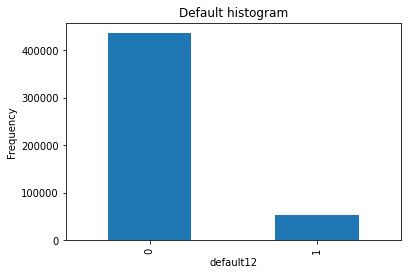

In [20]:
Data_Seleccionada_F6.value_counts(Data_Seleccionada_F6['default12']).plot.bar()
plt.title('Default histogram')
plt.xlabel('default12')
plt.ylabel('Frequency')
Data_Seleccionada_F6['default12'].value_counts()


In [21]:
pd.options.mode.chained_assignment = None  # default='warn'

In [22]:
Data_Seleccionada_F6.fillna({'saldoprom3':0,'saldomax3':0,'saldorcc':0,'nentdir':0,'varsldo3':0},inplace=True)

In [23]:
Data_Seleccionada_F6.isnull().sum(axis = 0)

saldo                                                  0
saldoprom3                                             0
saldomax3                                              0
saldorcc                                               0
nentdir                                                0
varsldo3                                               0
v999_ventas_netas                                      0
edad                                                   0
genero                                                 0
tipovi                                                 0
estadciv                                               0
ubidepa                                                0
plazobd1                                               0
v107_utilidad_del_negocio                              0
v106_liquidez_disponible_999_total_patrimonio_neto     0
v500_capital                                           0
v100_caja_y_bancos                                     0
v107_utilidad_del_negocio_999_t

**JUSTIFICACIÓN DE VARIABLES, ANALISIS ESTADÍSTICO E HISTOGRAMA**


##### **1. Género**

Text(0.5, 1.0, 'Histograma Variable genero')

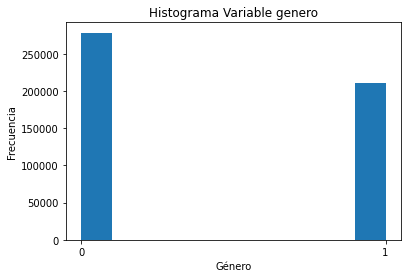

In [25]:
plt.hist (Data_Seleccionada_F6 ["genero"], bins = 10) 
plt.xticks ((0,1), ('0', '1'))
plt.xlabel ("Género") 
plt.ylabel ("Frecuencia") 
plt.title ("Histograma Variable genero") 

0.0 (% to exit) :  11.25
1.0 (% to exit) :  10.58


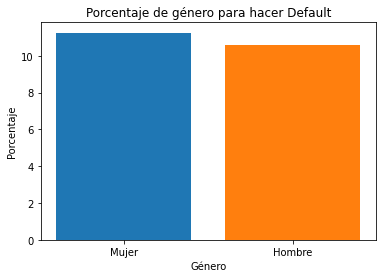

In [26]:
percentages = []
for gen in list(Data_Seleccionada_F6["genero"].unique()):
    
    p = round((Data_Seleccionada_F6["default12"][Data_Seleccionada_F6["genero"]==gen].value_counts()[1]/Data_Seleccionada_F6["default12"][Data_Seleccionada_F6["genero"]==gen].value_counts().sum())*100 , 2)
    
    percentages.append(p)
    print(gen,"(% to exit) : ", p)
plt.bar (0, percentages [0]) 
plt.bar (1, percentages [1])
plt.xticks ((0,1), ('Mujer', 'Hombre')) 
plt.xlabel ("Género") 
plt.ylabel ("Porcentaje") 
plt.title ("Porcentaje de género para hacer Default") 
plt. show()

##### **2. Ubicación del departamento**

Text(0.5, 1.0, 'Histograma Variable Ubidepa')

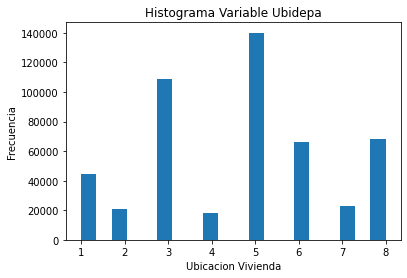

In [27]:
plt.hist (Data_Seleccionada_F6 ["ubidepa"], bins = 20) 
plt.xticks ((0,1,2,3,4,5,6,7), ('1','2','3','4','5','6','7','8')) 
plt.xlabel ("Ubicacion Vivienda") 
plt.ylabel ("Frecuencia") 
plt.title ("Histograma Variable Ubidepa") 

4 (% to exit) :  11.41
5 (% to exit) :  12.03
0 (% to exit) :  11.03
7 (% to exit) :  14.28
2 (% to exit) :  8.19
6 (% to exit) :  14.01
1 (% to exit) :  5.83
3 (% to exit) :  9.46


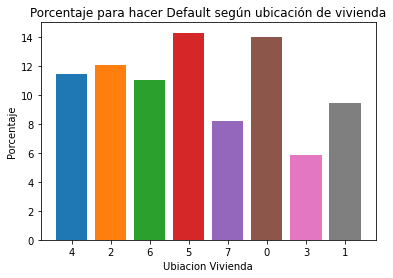

In [28]:
percentages = []
for gen in list(Data_Seleccionada_F6["ubidepa"].unique()):
    
    p = round((Data_Seleccionada_F6["default12"][Data_Seleccionada_F6["ubidepa"]==gen].value_counts()[1]/Data_Seleccionada_F6["default12"][Data_Seleccionada_F6["ubidepa"]==gen].value_counts().sum())*100 , 2)
    
    percentages.append(p)
    print(gen,"(% to exit) : ", p)
    
plt.bar (0, percentages [0]) 
plt.bar (1, percentages [1])
plt.bar (2, percentages [2]) 
plt.bar (3, percentages [3]) 
plt.bar (4, percentages [4]) 
plt.bar (5, percentages [5]) 
plt.bar (6, percentages [6]) 
plt.bar (7, percentages [7]) 
plt.xticks ((0,1,2,3,4,5,6,7), ('4','2','6','5','7','0','3','1')) 
plt.xlabel ("Ubiacion Vivienda") 
plt.ylabel ("Porcentaje") 
plt.title ("Porcentaje para hacer Default según ubicación de vivienda") 
plt. show()  

##### **3. Edad**

Text(0.5, 1.0, 'Histograma Variable edad')

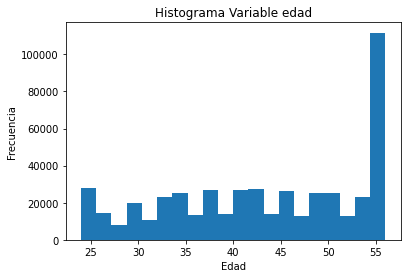

In [133]:
plt.hist (Data_Seleccionada_F6 ["edad"], bins = 20) 
plt.xlabel ("Edad") 
plt.ylabel ("Frecuencia")
plt.title ("Histograma Variable edad") 

##### **4. Tipo de vivienda**

Text(0.5, 1.0, 'Histograma Variable Tipovi')

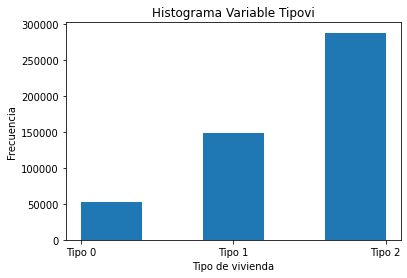

In [39]:
plt.hist (Data_Seleccionada_F7 ["tipovi"], bins = 5) 
plt.xticks ((0,1,2), ('Tipo 0', 'Tipo 1', 'Tipo 2')) 
plt.xlabel ("Tipo de vivienda") 
plt.ylabel ("Frecuencia")
plt.title ("Histograma Variable Tipovi") 

In [40]:
Data_Seleccionada_F7.tipovi.value_counts()

2    288111
1    149177
0     52437
Name: tipovi, dtype: int64

2 (% to exit) :  9.44
1 (% to exit) :  13.53
0 (% to exit) :  12.03


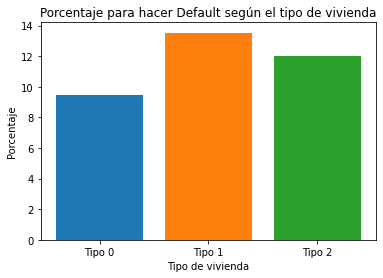

In [41]:
percentages = []
for gen in list(Data_Seleccionada_F7["tipovi"].unique()):
    p = round((Data_Seleccionada_F7["default12"][Data_Seleccionada_F7["tipovi"]==gen].value_counts()[1]/Data_Seleccionada_F7["default12"][Data_Seleccionada_F7["tipovi"]==gen].value_counts().sum())*100 , 2)
    percentages.append(p)
    print(gen,"(% to exit) : ", p)
plt.bar (0, percentages [0]) 
plt.bar (1, percentages [1])
plt.bar (2, percentages [2])
plt.xticks ((0,1,2), ('Tipo 0', 'Tipo 1', 'Tipo 2')) 
plt.xlabel ("Tipo de vivienda") 
plt.ylabel ("Porcentaje") 
plt.title ("Porcentaje para hacer Default según el tipo de vivienda") 
plt. show()

##### **5. Estado civil**

Text(0.5, 1.0, 'Histograma Variable EstadCiv')

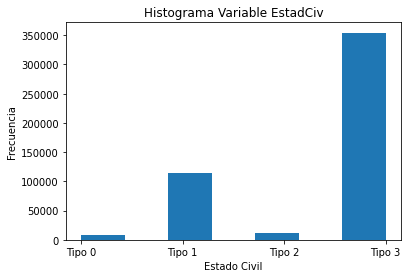

In [42]:
plt.hist (Data_Seleccionada_F7 ["estadciv"], bins = 7) 
plt.xticks ((0,1,2,3), ('Tipo 0', 'Tipo 1', 'Tipo 2','Tipo 3')) 
plt.xlabel ("Estado Civil") 
plt.ylabel ("Frecuencia")
plt.title ("Histograma Variable EstadCiv") 

In [43]:
Data_Seleccionada_F7.estadciv.value_counts()

3    354372
1    114806
2     11970
0      8577
Name: estadciv, dtype: int64

3 (% to exit) :  12.08
1 (% to exit) :  8.47
2 (% to exit) :  9.48
0 (% to exit) :  0.0


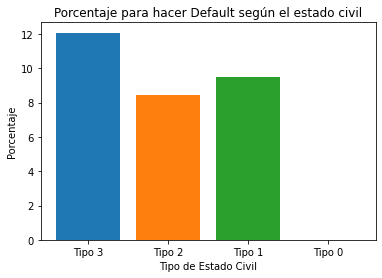

In [44]:
percentages = []
for gen in list(Data_Seleccionada_F7["estadciv"].unique()):
    p = round((Data_Seleccionada_F7["default12"][Data_Seleccionada_F7["estadciv"]==gen].value_counts()[0]/Data_Seleccionada_F7["default12"][Data_Seleccionada_F7["estadciv"]==gen].value_counts().sum())*100 , 2)
    percentages.append(100-p)
    print(gen,"(% to exit) : ", round(100-p,2))
plt.bar (0, percentages [0]) 
plt.bar (1, percentages [1])
plt.bar (2, percentages [2])
plt.bar (3, percentages [3])
plt.xticks ((0,1,2,3), ('Tipo 3', 'Tipo 2', 'Tipo 1','Tipo 0')) 
plt.xlabel ("Tipo de Estado Civil") 
plt.ylabel ("Porcentaje") 
plt.title ("Porcentaje para hacer Default según el estado civil") 
plt. show()

##### **6. Número de entidades**

In [45]:
Data_Seleccionada_F7.nentdir.value_counts()

1.0    208365
2.0    152981
3.0     88148
4.0     39704
0.0       527
Name: nentdir, dtype: int64

Text(0.5, 1.0, 'Histograma Variable Nentdir')

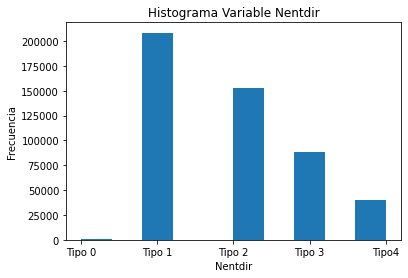

In [46]:
plt.hist (Data_Seleccionada_F7 ["nentdir"], bins = 10) 
plt.xticks ((0,1,2,3,4), ('Tipo 0', 'Tipo 1', 'Tipo 2','Tipo 3','Tipo4')) 
plt.xlabel ("Nentdir") 
plt.ylabel ("Frecuencia")
plt.title ("Histograma Variable Nentdir") 

0 (% to exit) :  8.35
1 (% to exit) :  7.48
2 (% to exit) :  11.46
3 (% to exit) :  14.64
4 (% to exit) :  19.15


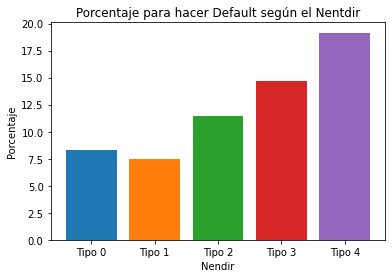

In [47]:
percentages = []
a=[0,1,2,3,4]
for gen in a:
    p = round((Data_Seleccionada_F7["default12"][Data_Seleccionada_F7["nentdir"]==gen].value_counts()[1]/Data_Seleccionada_F7["default12"][Data_Seleccionada_F7["nentdir"]==gen].value_counts().sum())*100 , 2)
    percentages.append(p)
    print(gen,"(% to exit) : ", round(p,2))
    
plt.bar (0, percentages [0]) 
plt.bar (1, percentages [1])
plt.bar (2, percentages [2])
plt.bar (3, percentages [3])
plt.bar (4, percentages [4])
plt.xticks ((0,1,2,3,4), ('Tipo 0', 'Tipo 1', 'Tipo 2','Tipo 3','Tipo 4')) 
plt.xlabel ("Nendir") 
plt.ylabel ("Porcentaje") 
plt.title ("Porcentaje para hacer Default según el Nentdir") 
plt. show()

##### **7. Saldo**

Text(0.5, 1.0, 'Histograma variable Saldo')

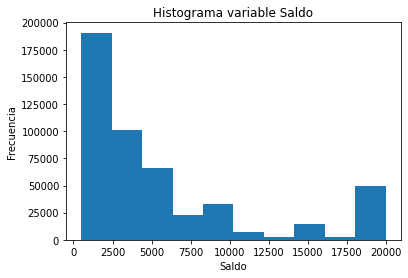

In [48]:
plt.hist (Data_Seleccionada_F7 ["saldo"]) 
plt.xlabel ("Saldo") 
plt.ylabel ("Frecuencia") 
plt.title ("Histograma variable Saldo") 

##### **8. Saldoprom3**

Text(0.5, 1.0, 'Histograma variable Saldoprom3')

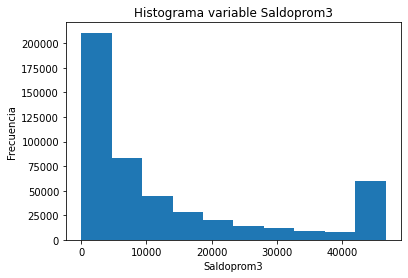

In [49]:
plt.hist (Data_Seleccionada_F7 ["saldoprom3"]) 
plt.xlabel ("Saldoprom3") 
plt.ylabel ("Frecuencia") 
plt.title ("Histograma variable Saldoprom3") 

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'Histograma variable Saldoprom3')

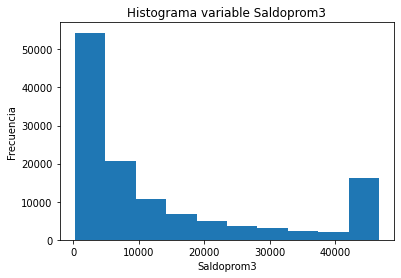

In [134]:
plt.hist (df_test ["saldoprom3"]) 
plt.xlabel ("Saldoprom3") 
plt.ylabel ("Frecuencia") 
plt.title ("Histograma variable Saldoprom3") 

##### **9. SaldoMax3**

Text(0.5, 1.0, 'Histograma variable Saldomax3')

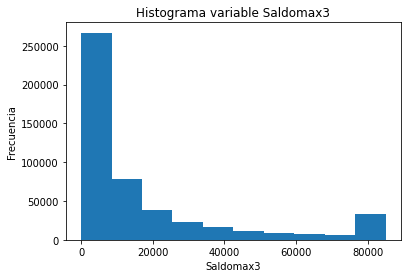

In [50]:
plt.hist (Data_Seleccionada_F7 ["saldomax3"]) 
plt.xlabel ("Saldomax3") 
plt.ylabel ("Frecuencia") 
plt.title ("Histograma variable Saldomax3")

##### **10. Capital**

Text(0.5, 1.0, 'Histograma variable Capital')

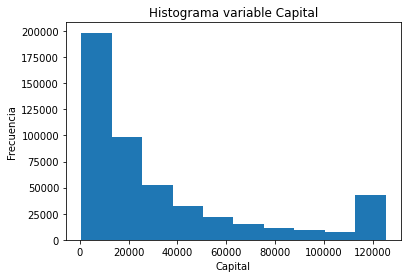

In [52]:
plt.hist (Data_Seleccionada_F7 ["v500_capital"]) 
plt.xlabel ("Capital") 
plt.ylabel ("Frecuencia") 
plt.title ("Histograma variable Capital") 

##### **11. Cajas y bancos**

Text(0.5, 1.0, 'Histograma variable Cajas y bancos')

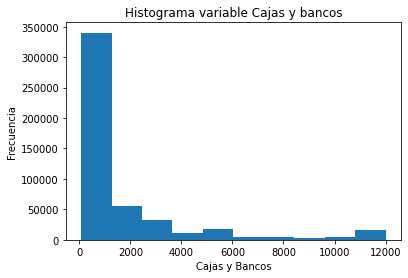

In [53]:
plt.hist (Data_Seleccionada_F7 ["v100_caja_y_bancos"]) 
plt.xlabel ("Cajas y Bancos") 
plt.ylabel ("Frecuencia") 
plt.title ("Histograma variable Cajas y bancos") 

##### **12. Liqueidez Disp/Patrimonio Neto**

Text(0.5, 1.0, 'Histograma variable Capital')

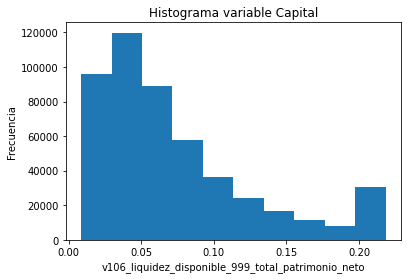

In [58]:
plt.hist (Data_Seleccionada_F7 ["v106_liquidez_disponible_999_total_patrimonio_neto"]) 
plt.xlabel ("v106_liquidez_disponible_999_total_patrimonio_neto") 
plt.ylabel ("Frecuencia") 
plt.title ("Histograma variable Capital") 

##### **13.Coeficientes de Pearson**

In [59]:
corr_matrix = Data_Seleccionada_F7.corr('pearson')
print('COEFICIENTES DE PEARSON-BISERIAL')
display(corr_matrix.iloc[17])

COEFICIENTES DE PEARSON-BISERIAL


saldo                                                 -0.068635
saldoprom3                                            -0.030254
saldomax3                                             -0.033294
saldorcc                                              -0.027174
nentdir                                                0.115565
varsldo3                                               0.070989
v999_ventas_netas                                     -0.061417
genero                                                -0.010703
tipovi                                                -0.047528
estadciv                                               0.062770
ubidepa                                                0.057918
plazobd1                                               0.038508
v107_utilidad_del_negocio                             -0.064471
v106_liquidez_disponible_999_total_patrimonio_neto     0.076748
v500_capital                                          -0.099853
v100_caja_y_bancos                      

In [60]:
Data_Seleccionada_F7.describe().loc[['min','max', 'mean'],:]

,saldo,saldoprom3,saldomax3,saldorcc,nentdir,varsldo3,v999_ventas_netas,genero,tipovi,estadciv,ubidepa,plazobd1,v107_utilidad_del_negocio,v106_liquidez_disponible_999_total_patrimonio_neto,v500_capital,v100_caja_y_bancos,v107_utilidad_del_negocio_999_total_patrimonio_neto,default12,Edad_bloques
min,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1050.000000,0.000000,0.000000,0.000000,0.000000,90.000000,381.927000,0.008611,640.00000,70.000000,0.012622,0.000000,1.000000
max,20000.000000,46706.019800,85004.193800,87007.841500,4.000000,1.000000,26166.000000,1.000000,2.000000,3.000000,7.000000,914.000000,8337.682000,0.218271,125329.00000,12000.000000,0.418703,1.000000,4.000000
mean,5698.611624,13281.679136,17572.408702,15898.660345,1.914517,0.874926,10693.169405,0.431646,1.481237,2.454157,3.673372,276.338355,2587.328471,0.073258,33473.86018,1695.930087,0.129046,0.109604,2.781049


In [61]:
Data_Seleccionada_F7.default12.value_counts()

0    436049
1     53676
Name: default12, dtype: int64

**Encapsulamiento del código de limpieza**

In [ ]:
def PreprocesamientoData4 (dataframe, PreprocesamientoData4 = None ) :
    from sklearn.preprocessing import StandardScaler
    from sklearn.decomposition import PCA
    from sklearn.feature_selection import VarianceThreshold

    Data_Preprocesada=dataframe[dataframe.default12.eq(0) | dataframe.default12.eq(1)]
    columns = ['saldo','saldoprom3','saldomax3','saldorcc','nentdir','varsldo3','v999_ventas_netas',
           'edad','genero','tipovi','estadciv','ubidepa','plazobd1','his_saldo_prom_03meses',
           'v107_utilidad_del_negocio','v106_liquidez_disponible_999_total_patrimonio_neto',
           'v500_capital','v100_caja_y_bancos','his_ant_tot_cred',
           'v107_utilidad_del_negocio_999_total_patrimonio_neto','default12']
    Data_Preprocesada = pd.DataFrame(Data_Preprocesada, columns=columns)
    mask = Data_Preprocesada['genero'].isna() 
    ind = Data_Preprocesada['genero'].loc[mask].sample(frac=(Data_Preprocesada.genero.value_counts(0)[1]/(Data_Preprocesada.genero.value_counts(0)[1]+Data_Preprocesada.genero.value_counts(0)[0]))).index
    Data_Preprocesada.loc[ind, 'genero'] = 1
    Data_Preprocesada['genero'] = Data_Preprocesada['genero'].fillna(0)
    Data_Preprocesada=Data_Preprocesada.dropna(thresh=Data_Preprocesada.shape[1]-5)
    Data_Preprocesada = Data_Preprocesada.dropna(thresh=Data_Preprocesada.shape[0]-(len(Data_Preprocesada.index))*0.1, axis=1)
    Data_Preprocesada.fillna({'saldoprom3':0,'saldomax3':0,'saldorcc':0,'nentdir':0,'varsldo3':0},inplace=True)
    Data_Preprocesada= Data_Preprocesada.dropna()
    Data_Preprocesada=Data_Preprocesada.reset_index(drop=True)  
    features = ['saldo','saldoprom3','saldomax3','saldorcc','nentdir','varsldo3','v999_ventas_netas',
           'edad','genero','tipovi','estadciv','ubidepa','plazobd1','v107_utilidad_del_negocio',
           'v106_liquidez_disponible_999_total_patrimonio_neto',
           'v500_capital','v100_caja_y_bancos','v107_utilidad_del_negocio_999_total_patrimonio_neto']
    x = Data_Preprocesada.loc[:, features].values
    y = Data_Preprocesada[['default12']]
    x = StandardScaler().fit_transform(x)
    pca = PCA(n_components=10)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents)
    Data_Preprocesada = pd.concat((principalDf,y), axis = 1)
    #Análisis de Varianza
    col_default = ['default12']
    Default_data = pd.DataFrame(Data_Preprocesada, columns=col_default)
    selector=VarianceThreshold(threshold=0.8)
    Aux_1=selector.fit_transform(Data_Preprocesada)
    Aux_2 = pd.DataFrame(data = Aux_1)
    Data_Preprocesada = pd.concat((Aux_2,Default_data), axis = 1)

    return Data_Preprocesada

# DATA UPSAMPLING (COPY PASTE)

<img src="https://miro.medium.com/max/422/1*aKJJOozIlVVH1gT-4rYy4w.png">


In [65]:
df_minority = Data_Seleccionada_F6[Data_Seleccionada_F6.default12==1]
df_majority = Data_Seleccionada_F6[Data_Seleccionada_F6.default12==0]

In [66]:
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=53676*3,    # to match majority class
                                 random_state=123) # reproducible results

In [67]:
print(df_minority.shape)
print(df_minority_upsampled.shape)

(53676, 20)
(161028, 20)


In [68]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

0    436049
1    161028
Name: default12, dtype: int64

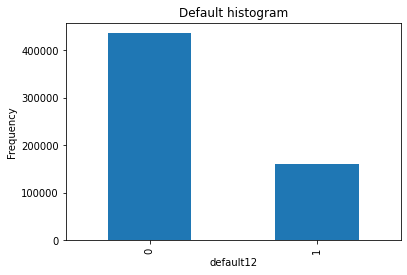

In [69]:
df_upsampled.value_counts(df_upsampled['default12']).plot.bar()
plt.title('Default histogram')
plt.xlabel('default12')
plt.ylabel('Frequency')
df_upsampled['default12'].value_counts()

In [70]:
Data_Prueba_1=df_upsampled

In [71]:
Data_Prueba_1.head(100)

,saldo,saldoprom3,saldomax3,saldorcc,nentdir,varsldo3,v999_ventas_netas,edad,genero,tipovi,estadciv,ubidepa,plazobd1,v107_utilidad_del_negocio,v106_liquidez_disponible_999_total_patrimonio_neto,v500_capital,v100_caja_y_bancos,v107_utilidad_del_negocio_999_total_patrimonio_neto,default12,Edad_bloques
0,10000.0,46706.019800,85004.1938,87007.8415,4.0,1.000000,26166.0,50,0.0,2,3,4,90,8337.682,0.026634,125329.00,12000.0,0.030038,0,3
1,2000.0,259.420000,383.5800,133.5500,1.0,0.514802,15600.0,32,0.0,1,3,5,374,1814.000,0.018699,55086.00,900.0,0.031880,0,2
2,1000.0,5442.710000,6211.2200,4723.3600,2.0,0.867832,6400.0,44,0.0,1,3,0,90,1540.000,0.061486,12359.00,1500.0,0.114083,0,3
4,2000.0,2012.775000,2314.0000,1711.5500,1.0,0.850343,1260.0,35,1.0,1,3,0,365,944.000,0.131787,3308.00,400.0,0.232971,0,2
5,10000.0,15073.506670,21637.7200,21637.7200,3.0,1.000000,8888.5,56,0.0,2,3,7,90,5946.710,0.032417,86858.29,200.0,0.066321,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,3000.0,24457.736670,30357.9100,30357.9100,3.0,1.000000,22356.0,47,1.0,2,1,2,90,2420.700,0.047500,41804.84,2000.0,0.054735,0,3
133,1000.0,17158.430000,17734.8600,17734.8600,2.0,1.000000,4200.0,32,1.0,2,3,0,365,2770.000,0.079441,22280.00,650.0,0.110579,0,2
134,5000.0,46706.019800,55926.9900,52139.0400,3.0,0.964803,23560.0,56,0.0,2,2,5,372,5885.000,0.159560,11067.87,2000.0,0.347139,0,4
135,4000.0,6646.653333,7310.7100,5977.9000,1.0,0.899385,9600.0,56,1.0,2,1,2,365,2503.500,0.079365,17696.50,3500.0,0.127081,0,4


# PCA

<img src="https://miro.medium.com/max/788/1*mgncZaKaVx9U6OCQu_m8Bg.jpeg">




In [72]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [73]:
features = ['saldo','saldoprom3','saldomax3','saldorcc','nentdir','varsldo3','v999_ventas_netas',
           'edad','genero','tipovi','estadciv','ubidepa','plazobd1','v107_utilidad_del_negocio','v106_liquidez_disponible_999_total_patrimonio_neto',
           'v500_capital','v100_caja_y_bancos','v107_utilidad_del_negocio_999_total_patrimonio_neto']
# Estandarizacion de la data 
x = Data_Prueba_1.loc[:, features].values
y = Data_Prueba_1.loc[:,['default12']].values
x = StandardScaler().fit_transform(x)

In [74]:
pd.DataFrame(data = x, columns = features).isnull().sum(axis = 0)

saldo                                                  0
saldoprom3                                             0
saldomax3                                              0
saldorcc                                               0
nentdir                                                0
varsldo3                                               0
v999_ventas_netas                                      0
edad                                                   0
genero                                                 0
tipovi                                                 0
estadciv                                               0
ubidepa                                                0
plazobd1                                               0
v107_utilidad_del_negocio                              0
v106_liquidez_disponible_999_total_patrimonio_neto     0
v500_capital                                           0
v100_caja_y_bancos                                     0
v107_utilidad_del_negocio_999_t

In [75]:
pca = PCA(n_components=10)

In [76]:
principalComponents = pca.fit_transform(x)

In [77]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['component 1', 'component 2','component 3','component 4', 'component 5', 'component 6', 'component 7', 'component 8', 'component 9', 'component 10'])

In [78]:
principalDf.head(597078)

,component 1,component 2,component 3,component 4,component 5,component 6,component 7,component 8,component 9,component 10
0,7.436477,0.636667,-1.333718,-0.300929,-0.998069,0.874651,0.841652,-1.299133,0.034457,0.736872
1,-0.931401,-0.976114,2.252927,-0.997501,0.343006,1.751956,0.739695,-0.412420,0.561615,0.104533
2,-1.296187,-0.235236,-0.123798,-0.642676,-1.374941,-0.547413,1.544209,0.300313,0.536405,0.853266
3,-2.329193,0.640286,1.231987,-0.047963,-0.507513,-2.251387,0.116128,0.358938,0.281657,-0.452577
4,1.636114,-0.590684,-1.423198,-0.111670,-0.003120,1.696428,-0.411837,-1.238835,-0.525621,1.121659
...,...,...,...,...,...,...,...,...,...,...
597072,0.858286,-0.378239,-0.929541,-0.540410,-0.096903,1.221507,-2.022615,1.708509,0.752513,0.705546
597073,-0.157851,0.879368,-1.796015,-0.042957,1.322609,1.399289,-0.462601,1.565996,0.431401,0.326985
597074,6.368324,0.780116,1.042227,-0.582750,-0.674631,1.626977,0.609653,-1.294139,-1.779895,-0.986941
597075,-1.920113,1.554168,1.402546,-1.571616,-0.062018,-0.888621,1.358885,1.312457,-0.547862,0.326322


In [79]:
print(principalDf.shape)

(597077, 10)


In [80]:
print(Data_Prueba_1.default12.shape)

(597077,)


In [81]:
Data_xd=Data_Prueba_1

In [82]:
y=Data_xd[['default12']]
z=y.reset_index(drop=True)

In [83]:
finalDf = pd.concat((principalDf,z), axis = 1)

In [84]:
corr_matrix = finalDf.corr('pearson')
print('COEFICIENTES DE PEARSON-BISERIAL')
display(corr_matrix.iloc[10])

COEFICIENTES DE PEARSON-BISERIAL


component 1    -0.099252
component 2     0.154110
component 3    -0.129546
component 4    -0.093732
component 5     0.086275
component 6    -0.044432
component 7    -0.073584
component 8    -0.013658
component 9     0.033511
component 10    0.000060
default12       1.000000
Name: default12, dtype: float64

In [85]:
del finalDf['component 10']

In [86]:
Data_Prueba_2=finalDf

# SMOTE

<img src="https://machinelearningparatodos.com/wp-content/uploads/2020/01/desbalanceo-1140x641.jpeg">

In [ ]:
! pip install imbalanced-learn

In [ ]:
import imblearn
print(imblearn.__version__)

In [ ]:
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold


In [ ]:
def datasmote(data):
    #DIVISIÓN DE DATOS
    X = np.array(Data_Seleccionada_F6.iloc[:, Data_Seleccionada_F6.columns != 'default12'])
    y = np.array(Data_Seleccionada_F6.iloc[:, Data_Seleccionada_F6.columns == 'default12'])
    #SMOTE CATEGORIAL
    sm = SMOTENC(random_state=42,sampling_strategy = 0.37, categorical_features=[4,8,9,10,11])
    X_res, y_res = sm.fit_resample(X, y)
    print('Resampled dataset samples per class {}'.format(Counter(y_res)))
    #MATRIZ X
    X_res_smote = pd.DataFrame(X_res, columns = ['saldo','saldoprom3', 'saldomax3', 'saldorcc','nentdir','varsldo3','v999_ventas_netas','edad','genero',
                                             'tipovi','estadciv','ubidepa','plazobd1','v107_utilidad_del_negocio','v106_liquidez_disponible_999_total_patrimonio_neto',
                                             'v500_capital','v100_caja_y_bancos', 'v107_utilidad_del_negocio_999_total_patrimonio_neto'])
    y_res_smote = pd.DataFrame(y_res, columns = ['default12'])

    data = pd.concat((X_res_smote,y_res_smote), axis = 1)

    data['nentdir']=data['nentdir'].astype('int32')
    data['genero']=data['genero'].astype('int32')
    data['tipovi']=data['tipovi'].astype('int32')
    data['estadciv']=data['estadciv'].astype('int32')
    data['ubidepa']=data['ubidepa'].astype('int32')

    return (data)

# ANÁLISIS DE VARIANZA

## Con data upsampling

In [87]:
from sklearn.feature_selection import VarianceThreshold

In [88]:
print(Data_Prueba_1.var())

saldo                                                  3.331489e+07
saldoprom3                                             2.293427e+08
saldomax3                                              5.371801e+08
saldorcc                                               5.095204e+08
nentdir                                                9.643330e-01
varsldo3                                               3.211626e-02
v999_ventas_netas                                      6.736419e+07
edad                                                   1.062883e+02
genero                                                 2.448309e-01
tipovi                                                 4.660718e-01
estadciv                                               7.854382e-01
ubidepa                                                4.284756e+00
plazobd1                                               3.533535e+04
v107_utilidad_del_negocio                              4.115068e+06
v106_liquidez_disponible_999_total_patrimonio_ne

Separacion variables categóricas/continuas

In [89]:
columns = ['nentdir','edad','genero','tipovi','estadciv','ubidepa']
columns_Co = ['saldo','saldoprom3','saldomax3','saldorcc','varsldo3','v999_ventas_netas',
              'plazobd1','v107_utilidad_del_negocio','v106_liquidez_disponible_999_total_patrimonio_neto',
              'v500_capital','v100_caja_y_bancos',
              'v107_utilidad_del_negocio_999_total_patrimonio_neto'] 
col_default = ['default12']
Categorical_data = pd.DataFrame(Data_Prueba_1, columns=columns)
Continua_data = pd.DataFrame(Data_Prueba_1, columns=columns_Co)
Default_data = pd.DataFrame(Data_Prueba_1, columns=col_default)

In [90]:
print(Continua_data.var())

saldo                                                  3.331489e+07
saldoprom3                                             2.293427e+08
saldomax3                                              5.371801e+08
saldorcc                                               5.095204e+08
varsldo3                                               3.211626e-02
v999_ventas_netas                                      6.736419e+07
plazobd1                                               3.533535e+04
v107_utilidad_del_negocio                              4.115068e+06
v106_liquidez_disponible_999_total_patrimonio_neto     3.051398e-03
v500_capital                                           1.286761e+09
v100_caja_y_bancos                                     6.452581e+06
v107_utilidad_del_negocio_999_total_patrimonio_neto    1.154112e-02
dtype: float64


In [91]:
selector=VarianceThreshold(threshold=1000)
Continua_data_F1=selector.fit_transform(Continua_data)

In [92]:
Continua_data_F2 = pd.DataFrame(data = Continua_data_F1
             , columns = ['saldo','saldoprom3','saldomax3','saldorcc','v999_ventas_netas',
              'plazobd1','v107_utilidad_del_negocio',
              'v500_capital','v100_caja_y_bancos'])

In [93]:
z=Default_data.reset_index(drop=True)
z1=Categorical_data.reset_index(drop=True)

In [94]:
Data_Prueba_3 = pd.concat((z1,Continua_data_F2,z), axis = 1)

## Con Data PCA

In [95]:
print(Data_Prueba_2.var())

component 1    6.166456
component 2    2.054360
component 3    1.489350
component 4    1.258544
component 5    1.109164
component 6    1.047066
component 7    0.900277
component 8    0.858099
component 9    0.697725
default12      0.196959
dtype: float64


In [96]:
col_default = ['default12']
Default_data = pd.DataFrame(Data_Prueba_2, columns=col_default)

In [97]:
selector=VarianceThreshold(threshold=0.8)
Aux_1=selector.fit_transform(Data_Prueba_2)

In [98]:
Aux_2 = pd.DataFrame(data = Aux_1,
                                columns = ['component 1', 'component 2','component 3',
                                           'component 4', 'component 5', 'component 6', 
                                           'component 7', 'component 8'])

In [99]:
Data_Prueba_4 = pd.concat((Aux_2,Default_data), axis = 1)

In [100]:
data=Data_Prueba_4

# QUANTILE TRANSFORMER

In [101]:
from sklearn.preprocessing import QuantileTransformer

In [102]:
def QuantileTransform(dataframe, QuantileTransform=None):
    qt=QuantileTransformer(n_quantiles=10, output_distribution='normal',random_state=0)
    x=len(dataframe.columns)
    y=len(dataframe.index)
    Data_Transformada=np.zeros((y,x))
    for i in range (0,x):
      aux1=dataframe.iloc[:,[i]].values
      aux2=qt.fit_transform(aux1)
      Data_Transformada[:,[i]] = aux2 
    Data_Transformada_1 = pd.DataFrame(data = Data_Transformada)
    return (Data_Transformada_1)

In [103]:
col_default = ['default12']
Resto_data = pd.DataFrame(data = Data_Prueba_3
             , columns = ['nentdir','edad','genero','tipovi','estadciv','ubidepa','saldo','saldoprom3','saldomax3','saldorcc','v999_ventas_netas',
              'plazobd1','v107_utilidad_del_negocio',
              'v500_capital','v100_caja_y_bancos'])
Default_data = pd.DataFrame(Data_Prueba_3, columns = col_default)

In [104]:
Aux=QuantileTransform(Resto_data)

In [105]:
Aux.columns=['nentdir','edad','genero','tipovi','estadciv','ubidepa','saldo','saldoprom3','saldomax3','saldorcc','v999_ventas_netas',
              'plazobd1','v107_utilidad_del_negocio',
              'v500_capital','v100_caja_y_bancos']
Data_Prueba_5 = pd.concat((Aux,Default_data), axis = 1)

In [106]:
Data_Prueba_5.head(597077)

,nentdir,edad,genero,tipovi,estadciv,ubidepa,saldo,saldoprom3,saldomax3,saldorcc,v999_ventas_netas,plazobd1,v107_utilidad_del_negocio,v500_capital,v100_caja_y_bancos,default12
0,5.199338,0.430727,-5.199338,5.199338,5.199338,0.139710,0.876143,5.199338,5.199338,5.199338,5.199338,-5.199338,5.199338,5.199338,5.199338,0
1,-0.764710,-0.923867,-5.199338,-0.764710,5.199338,0.764710,-0.430727,-1.861440,-1.767271,-2.035386,0.682939,0.764710,0.012946,0.845794,0.282216,0
2,0.139710,0.000000,-5.199338,-0.764710,5.199338,-5.199338,-1.220640,-0.076705,-0.081933,-0.126991,-0.139710,-5.199338,-0.230362,-0.226965,0.589456,0
3,-0.764710,-0.674490,5.199338,-0.764710,5.199338,-5.199338,-0.430727,-0.723239,-0.741073,-0.742972,-2.147594,0.282216,-1.046870,-1.258261,-0.430727,0
4,0.967422,5.199338,-5.199338,5.199338,5.199338,5.199338,0.876143,0.535086,0.687539,0.779932,0.184355,-5.199338,1.360023,1.207936,-1.220640,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597072,5.199338,-0.282216,5.199338,-0.764710,-0.967422,5.199338,0.139710,0.339298,0.285886,0.352730,0.568130,-0.343731,0.749234,0.899469,0.589456,1
597073,5.199338,-0.069685,-5.199338,-0.764710,-0.967422,5.199338,0.430727,0.487505,0.434987,0.503945,-0.044577,0.052558,0.437276,-0.374338,0.793000,1
597074,-0.764710,-1.012893,-5.199338,5.199338,5.199338,0.967422,5.199338,5.199338,1.868353,1.699177,5.199338,-5.199338,5.199338,5.199338,1.382994,1
597075,-0.764710,-5.199338,-5.199338,-5.199338,5.199338,-1.220640,-0.060681,-1.124962,-1.231006,-1.011007,-0.027855,0.508488,-0.187451,-0.725026,0.430727,1


In [107]:
corr_matrix = Data_Prueba_5.corr('pearson')
print('COEFICIENTES DE PEARSON-BISERIAL')
display(corr_matrix.iloc[15])

COEFICIENTES DE PEARSON-BISERIAL


nentdir                      0.144187
edad                        -0.052678
genero                      -0.017978
tipovi                      -0.070301
estadciv                     0.093208
ubidepa                      0.056327
saldo                       -0.088146
saldoprom3                  -0.031454
saldomax3                   -0.034941
saldorcc                    -0.001069
v999_ventas_netas           -0.080295
plazobd1                     0.094111
v107_utilidad_del_negocio   -0.086225
v500_capital                -0.149508
v100_caja_y_bancos          -0.108245
default12                    1.000000
Name: default12, dtype: float64

**SALDO**

Text(0.5, 1.0, 'Histograma Variable Saldo')

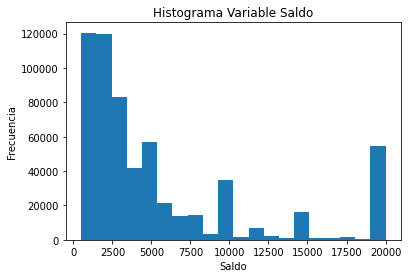

In [108]:
plt.hist (Data_Prueba_3 ["saldo"], bins = 20) 
plt.xlabel ("Saldo") 
plt.ylabel ("Frecuencia")
plt.title ("Histograma Variable Saldo") 

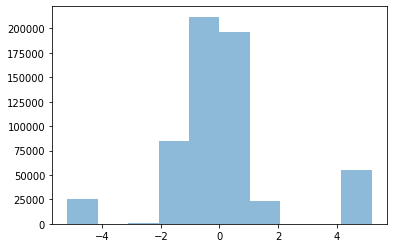

In [109]:
qt=QuantileTransformer(n_quantiles=10, output_distribution='normal',random_state=0)
saldo_colum = Data_Prueba_3.iloc[:,[6]].values
Data_Transformada=qt.fit_transform(saldo_colum)
plt.hist (Data_Transformada, alpha=0.5)
plt.show()
Data = pd.DataFrame(data = Data_Transformada)

DATA PCA

In [110]:
col_default = ['default12']
Resto_data = pd.DataFrame(data = Data_Prueba_4
             , columns = ['component 1', 'component 2','component 3','component 4', 'component 5', 'component 6', 
                          'component 7', 'component 8'])
Default_data = pd.DataFrame(Data_Prueba_4, columns = col_default)

In [111]:
Aux=QuantileTransform(Resto_data)

In [112]:
Aux.columns=['component 1', 'component 2','component 3','component 4', 'component 5', 'component 6', 
                          'component 7', 'component 8']
Data_Prueba_6 = pd.concat((Aux,Default_data), axis = 1)

In [113]:
Data_Prueba_6.head(597077)

,component 1,component 2,component 3,component 4,component 5,component 6,component 7,component 8,default12
0,2.029374,0.523089,-1.098582,-0.200260,-0.880364,0.834198,0.854090,-1.313977,0
1,-0.040096,-0.606659,1.301617,-0.841718,0.372975,1.319288,0.770928,-0.305865,0
2,-0.285913,-0.043729,-0.057970,-0.506283,-1.279276,-0.501207,1.340147,0.388870,0
3,-1.274876,0.525151,1.034913,0.014910,-0.355296,-1.531991,0.061432,0.445941,0
4,0.817161,-0.303912,-1.193608,-0.038707,0.063238,1.307483,-0.437193,-1.292621,0
...,...,...,...,...,...,...,...,...,...
597072,0.629558,-0.144977,-0.753608,-0.415455,-0.014211,1.172872,-1.781411,1.348937,1
597073,0.320639,0.667045,-1.305257,0.019123,1.234565,1.247198,-0.479696,1.317397,1
597074,1.680310,0.606667,0.892617,-0.453322,-0.512314,1.292969,0.606674,-1.312186,1
597075,-0.878110,1.012525,1.183586,-1.286919,0.014583,-0.823486,1.272254,1.264317,1


In [114]:
corr_matrix = Data_Prueba_6.corr('pearson')
print('COEFICIENTES DE PEARSON-BISERIAL')
display(corr_matrix.iloc[8])

COEFICIENTES DE PEARSON-BISERIAL


component 1   -0.111008
component 2    0.155855
component 3   -0.124607
component 4   -0.093247
component 5    0.101084
component 6   -0.038994
component 7   -0.071935
component 8   -0.001010
default12      1.000000
Name: default12, dtype: float64

# ROBUST SCALER

In [115]:
from sklearn.preprocessing import RobustScaler

In [116]:
def RobustScaler(dataframe, RobustScaler=None):
    from sklearn.preprocessing import RobustScaler
    x=len(dataframe.columns)
    y=len(dataframe.index)
    Data_Transformada=np.zeros((y,x))
    for i in range (0,x):
      aux1=dataframe.iloc[:,[i]].values
      aux2=RobustScaler()
      aux3=aux2.fit_transform(aux1)
      Data_Transformada[:,[i]] = aux3 
    Data_Transformada_1 = pd.DataFrame(data = Data_Transformada)
    return (Data_Transformada_1)

**DATA UPSAMPLING**

In [117]:
Data_Prueba_7=RobustScaler(Data_Prueba_3)

In [118]:
Data_Prueba_7.columns=['nentdir','edad','genero','tipovi','estadciv','ubidepa','saldo','saldoprom3','saldomax3','saldorcc','v999_ventas_netas',
              'plazobd1','v107_utilidad_del_negocio',
              'v500_capital','v100_caja_y_bancos', 'default12']

In [119]:
Data_Prueba_7.head(500000)

,nentdir,edad,genero,tipovi,estadciv,ubidepa,saldo,saldoprom3,saldomax3,saldorcc,v999_ventas_netas,plazobd1,v107_utilidad_del_negocio,v500_capital,v100_caja_y_bancos,default12
0,1.0,0.333333,0.0,0.0,0.0,0.000000,1.272727,2.531098,4.393357,5.118846,1.689267,-0.765125,3.531331,3.212493,9.500000,0.0
1,-0.5,-0.666667,0.0,-1.0,0.0,0.333333,-0.181818,-0.356619,-0.369864,-0.351049,0.744186,0.245552,0.018309,1.140000,0.250000,0.0
2,0.0,0.000000,0.0,-1.0,0.0,-1.333333,-0.363636,-0.034360,-0.041831,-0.062059,-0.078712,-0.765125,-0.129241,-0.120644,0.750000,0.0
3,-0.5,-0.500000,1.0,-1.0,0.0,-1.333333,-0.181818,-0.247608,-0.261202,-0.251693,-0.538462,0.213523,-0.450188,-0.387691,-0.166667,0.0
4,0.5,0.666667,0.0,0.0,0.0,1.000000,1.272727,0.564414,0.826513,1.002925,0.143873,-0.765125,2.243786,2.077429,-0.333333,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,0.0,0.555556,0.0,-1.0,-2.0,0.333333,-0.327273,0.415710,0.975807,-0.291871,-0.319320,0.213523,-0.577814,-0.047197,-0.250000,1.0
499996,-0.5,0.055556,1.0,-2.0,0.0,0.333333,-0.181818,2.531098,4.393357,1.451133,-0.187835,0.217082,0.378411,0.238671,0.333333,1.0
499997,0.0,-0.333333,0.0,-1.0,0.0,0.000000,-0.181818,-0.268983,-0.282538,-0.237626,-0.243292,0.217082,-0.166936,-0.388369,-0.291667,1.0
499998,1.0,0.666667,0.0,0.0,-2.0,1.000000,0.000000,-0.101207,-0.082890,-0.161398,-0.110912,0.213523,0.383953,-0.175448,-0.083333,1.0


**DATA PCA**

In [120]:
Data_Prueba_8=RobustScaler(Data_Prueba_4)

In [121]:
Data_Prueba_8.columns = ['component 1', 'component 2','component 3',
                                           'component 4', 'component 5', 'component 6', 
                                           'component 7', 'component 8', 'default12']

In [122]:
Data_Prueba_8.head(500000)

,component 1,component 2,component 3,component 4,component 5,component 6,component 7,component 8,default12
0,3.112516,0.422506,-0.812579,-0.145709,-0.634875,0.606131,0.623152,-0.929213,0.0
1,-0.020624,-0.415343,1.461286,-0.589438,0.282144,1.220667,0.543586,-0.240560,0.0
2,-0.157209,-0.030453,-0.045513,-0.363408,-0.892578,-0.389999,1.171416,0.312974,0.0
3,-0.543992,0.424386,0.814029,0.015435,-0.299436,-1.583601,0.056965,0.358505,0.0
4,0.940717,-0.215111,-0.869307,-0.025148,0.045465,1.181771,-0.355050,-0.882383,0.0
...,...,...,...,...,...,...,...,...,...
499995,-0.105865,-0.897090,0.500011,0.731563,0.641297,1.666461,0.529994,0.604991,1.0
499996,0.833020,0.277213,0.947834,-0.366111,-0.053161,0.557205,-0.761689,-0.049934,1.0
499997,-0.555165,1.200596,-0.202050,0.064891,0.427986,-0.273722,0.290832,0.093525,1.0
499998,-0.047152,-0.266246,-1.145157,0.883133,1.145928,1.224366,-0.295374,0.321533,1.0


**EJEMPLO ROBUST SCALER**

In [128]:
from sklearn.preprocessing import RobustScaler
X1=Data_Prueba_3.iloc[:,[6]].values
rsc=RobustScaler()
a=rsc.fit_transform(X1)

In [129]:
np.median(X1)

3000.0

In [130]:
np.median(a)

0.0

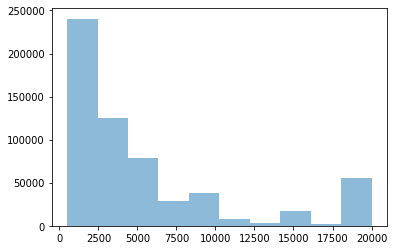

In [131]:
plt.hist (X1, alpha=0.5)
plt.show()

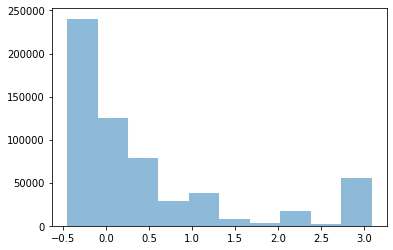

In [132]:
plt.hist (a, alpha=0.5)
plt.show()

**ARQUITECTURA Y CÓDIGO DE ENTRENAMIENTO**

**Tabnet**

In [ ]:
!pip install pytorch_tabnet

In [ ]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9681 sha256=0b1e3e605945177986f3a32e391eadd9da84ae75f8b6d2f35bbbe247276aaccb
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [ ]:
from pytorch_tabnet.tab_model import TabNetClassifier
import torch
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score,f1_score,precision_recall_curve

import pandas as pd
import numpy as np
np.random.seed(0)

import os
import wget
from pathlib import Path

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          label = "label",
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
               precision,recall,f1_score)
        # else:
        #     stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('Correct '+label)
        plt.xlabel('Predicted ' +label+ stats_text)
    else:
        plt.xlabel(stats_text)
    

    if title:
        plt.title(title)
    else:
        plt.title("Confusion matrix")

In [ ]:
#Guardamos el random state para dividir la data en train, valid y test
r = np.random.RandomState(1)

target = "default12"

if "Set" not in data.columns:
  data["Set"] = r.choice(['train','valid','test'],p=[.8,.10,.10], size = (data.shape[0],))

train_indices = data[data.Set=="train"].index
valid_indices = data[data.Set=="valid"].index
test_indices = data[data.Set=="test"].index

In [ ]:
nunique = data.nunique()
types = data.dtypes

In [ ]:
categorical_columns = []
categorical_dims = {}

for col in data.columns:
  if types[col] == 'object' or nunique[col] < 200:
    print (col, data[col].nunique())
    l_enc= LabelEncoder()
    data[col] = data[col].fillna("VV_likely")
    data[col] = l_enc.fit_transform(data[col].values)
    categorical_columns.append(col)
    categorical_dims[col] = len(l_enc.classes_)
  else:
    data.fillna(0,inplace=True)

default12 2
Set 3


**Define categorical features for categorical embeddings**

In [ ]:
unused_feat = ['Set']

features = [col for col in data.columns if col not in unused_feat+[target]]
cat_idxs = [i for i, f in enumerate(features) if f in categorical_columns]
cat_dims = [categorical_dims[f] for i, f in enumerate(features) if f in categorical_columns]

In [ ]:
print(f"Used features: {features}")
print("-------")
print(f"Categorical features indices: {cat_idxs}")
print("-------")
print(f"Number of modalities per categorical feature: {cat_dims}")

Used features: ['component 1', 'component 2', 'component 3', 'component 4', 'component 5', 'component 6', 'component 7', 'component 8']
-------
Categorical features indices: []
-------
Number of modalities per categorical feature: []


**Creating train, valid, test matrices**

In [ ]:
X_train = data[features].values[train_indices]
y_train = data[target].values[train_indices]

X_valid = data[features].values[valid_indices]
y_valid = data[target].values[valid_indices]

X_test = data[features].values[test_indices]
y_test = data[target].values[test_indices]

In [ ]:
len(X_train)

478135

**Parámetros de la Red**

In [ ]:
clf = TabNetClassifier(cat_idxs= cat_idxs,cat_dims=cat_dims, cat_emb_dim=1,n_d=128,n_a=128,lambda_sparse=0.0001,n_steps=5,gamma=1.4)

Device used : cuda


In [ ]:
clf

TabNetClassifier(n_d=128, n_a=128, n_steps=5, gamma=1.4, cat_idxs=[], cat_dims=[], cat_emb_dim=1, n_independent=2, n_shared=2, epsilon=1e-15, momentum=0.02, lambda_sparse=0.0001, seed=0, clip_value=1, verbose=1, optimizer_fn=<class 'torch.optim.adam.Adam'>, optimizer_params={'lr': 0.02}, scheduler_fn=None, scheduler_params={}, mask_type='sparsemax', input_dim=None, output_dim=None, device_name='auto')

In [ ]:
max_epochs = 1000 if not os.getenv("CI", False) else 20

In [ ]:
clf.fit(X_train= X_train, y_train=y_train,
        eval_set= [(X_train, y_train),(X_valid,y_valid)],
        eval_name = ['train','valid'],
        eval_metric = ['auc'],
        max_epochs = max_epochs, patience = 15,
        batch_size = 32768, virtual_batch_size = 4096,
        num_workers = 1,
        weights = 1,
        drop_last = False)

epoch 0  | loss: 1.64563 | train_auc: 0.5811  | valid_auc: 0.58049 |  0:00:14s
epoch 1  | loss: 0.74731 | train_auc: 0.6467  | valid_auc: 0.64762 |  0:00:29s
epoch 2  | loss: 0.65932 | train_auc: 0.66146 | valid_auc: 0.66054 |  0:00:44s
epoch 3  | loss: 0.64614 | train_auc: 0.67303 | valid_auc: 0.67048 |  0:00:58s
epoch 4  | loss: 0.64264 | train_auc: 0.6771  | valid_auc: 0.67393 |  0:01:13s
epoch 5  | loss: 0.64023 | train_auc: 0.67756 | valid_auc: 0.67594 |  0:01:27s
epoch 6  | loss: 0.63999 | train_auc: 0.68059 | valid_auc: 0.67945 |  0:01:42s
epoch 7  | loss: 0.63942 | train_auc: 0.68177 | valid_auc: 0.68045 |  0:01:57s
epoch 8  | loss: 0.63954 | train_auc: 0.68074 | valid_auc: 0.67965 |  0:02:12s
epoch 9  | loss: 0.63946 | train_auc: 0.68215 | valid_auc: 0.67981 |  0:02:27s
epoch 10 | loss: 0.63899 | train_auc: 0.68028 | valid_auc: 0.67905 |  0:02:41s
epoch 11 | loss: 0.63933 | train_auc: 0.68363 | valid_auc: 0.6814  |  0:02:56s
epoch 12 | loss: 0.63879 | train_auc: 0.6843  | vali

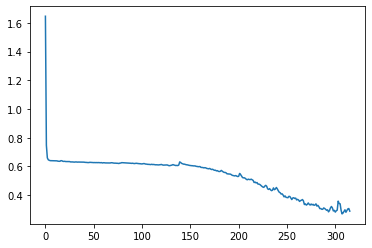

In [ ]:
#plot losses
plt.plot(clf.history['loss'])

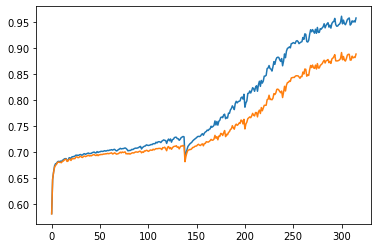

In [ ]:
# plot auc
plt.plot(clf.history['train_auc'])
plt.plot(clf.history['valid_auc'])

**Predicciones**

In [ ]:
preds_train = clf.predict_proba(X_train)
train_auc = roc_auc_score(y_score=preds_train[:,1], y_true = y_train)
print(f"Final train score for : {train_auc}")

Final train score for : 0.9609754715627055


In [ ]:
preds_valid = clf.predict_proba(X_valid)
valid_auc = roc_auc_score(y_score=preds_valid[:,1], y_true=y_valid)
print (f"Best valid score for: {clf.best_cost}")
print(f"Final valid score for : {clf.history['valid_auc'][-1]}")


Best valid score for: 0.8910963391891717
Final valid score for : 0.8881893002798661


In [ ]:
preds_test = clf.predict_proba(X_test)
test_auc = roc_auc_score(y_score=preds_test[:,1], y_true = y_test)
print(f"Final test score for: {test_auc}")

Final test score for: 0.8895379120236444


**Matriz de confusión sobre el dataset de dev y testing**

In [ ]:
#ROC CURVE
def curva_f1(y_true, y_pred):
    # calculate roc curves
    precision, recall, thresholds = precision_recall_curve(y_true, y_pred)
    # convert to f score
    fscore = (2 * precision * recall) / (precision + recall)
    # locate the index of the largest f score
    ix = np.argmax(fscore)
    print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
    # plot the roc curve for the model
    no_skill = len(y_true[y_true==1]) / len(y_true)
    plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
    plt.plot(recall, precision, marker='.', label='ANN')
    plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
    # axis labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.show()

Best Threshold=0.515555, F-Score=0.706


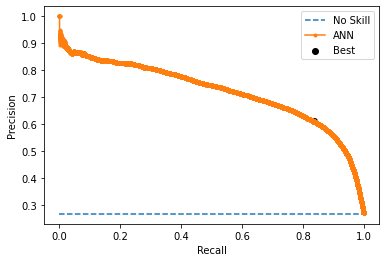

In [ ]:
curva_f1(y_true=y_test,y_pred=preds_test[:,1])

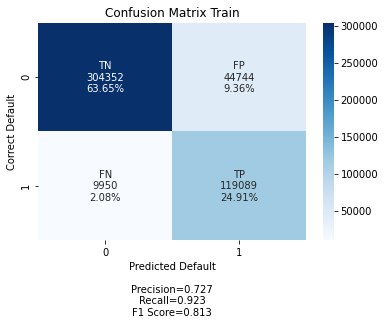

In [ ]:
from sklearn.metrics import confusion_matrix

umbral = 0.515555
y_pred_valid =  preds_valid[:,1]> umbral
y_pred_test =  preds_test[:,1]> umbral
y_pred_train =  preds_train[:,1]> umbral
cf_matrix_valid = confusion_matrix(y_true=y_valid,y_pred=y_pred_valid)
cf_matrix_test = confusion_matrix(y_true=y_test,y_pred=y_pred_test)
cf_matrix_train = confusion_matrix(y_true=y_train,y_pred=y_pred_train)

labels = ['TN','FP','FN','TP']
categories = ['0', '1']
make_confusion_matrix(cf_matrix_train, 
                      group_names=labels,
                      label = "Default",
                      categories=categories, 
                      cmap='Blues',
                      title = "Confusion Matrix Train")

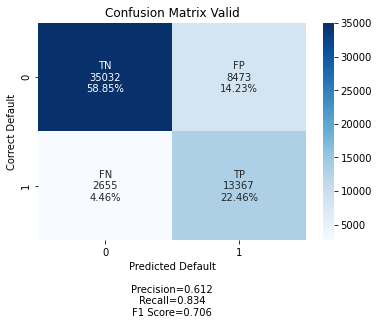

In [ ]:

umbral = 0.515555
y_pred_valid =  preds_valid[:,1]> umbral
y_pred_test =  preds_test[:,1]> umbral
cf_matrix_valid = confusion_matrix(y_true=y_valid,y_pred=y_pred_valid)
cf_matrix_test = confusion_matrix(y_true=y_test,y_pred=y_pred_test)

labels = ['TN','FP','FN','TP']
categories = ['0', '1']
make_confusion_matrix(cf_matrix_valid, 
                      group_names=labels,
                      label = "Default",
                      categories=categories, 
                      cmap='Blues',
                      title = "Confusion Matrix Valid")

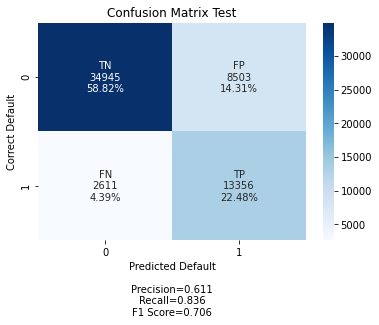

In [ ]:
umbral = 0.515555
y_pred_valid =  preds_valid[:,1]> umbral
y_pred_test =  preds_test[:,1]> umbral
cf_matrix_valid = confusion_matrix(y_true=y_valid,y_pred=y_pred_valid)
cf_matrix_test = confusion_matrix(y_true=y_test,y_pred=y_pred_test)

labels = ['TN','FP','FN','TP']
categories = ['0', '1']
make_confusion_matrix(cf_matrix_test, 
                      group_names=labels,
                      label = "Default",
                      categories=categories, 
                      cmap='Blues',
                      title = "Confusion Matrix Test")

**Global explainability : feat importance summing to 1**

In [ ]:
clf.feature_importances_

array([0.11091476, 0.14409572, 0.17371606, 0.13175105, 0.15826437,
       0.14897014, 0.04285597, 0.08943193])

In [ ]:
explain_matrix, masks = clf.explain(X_test)

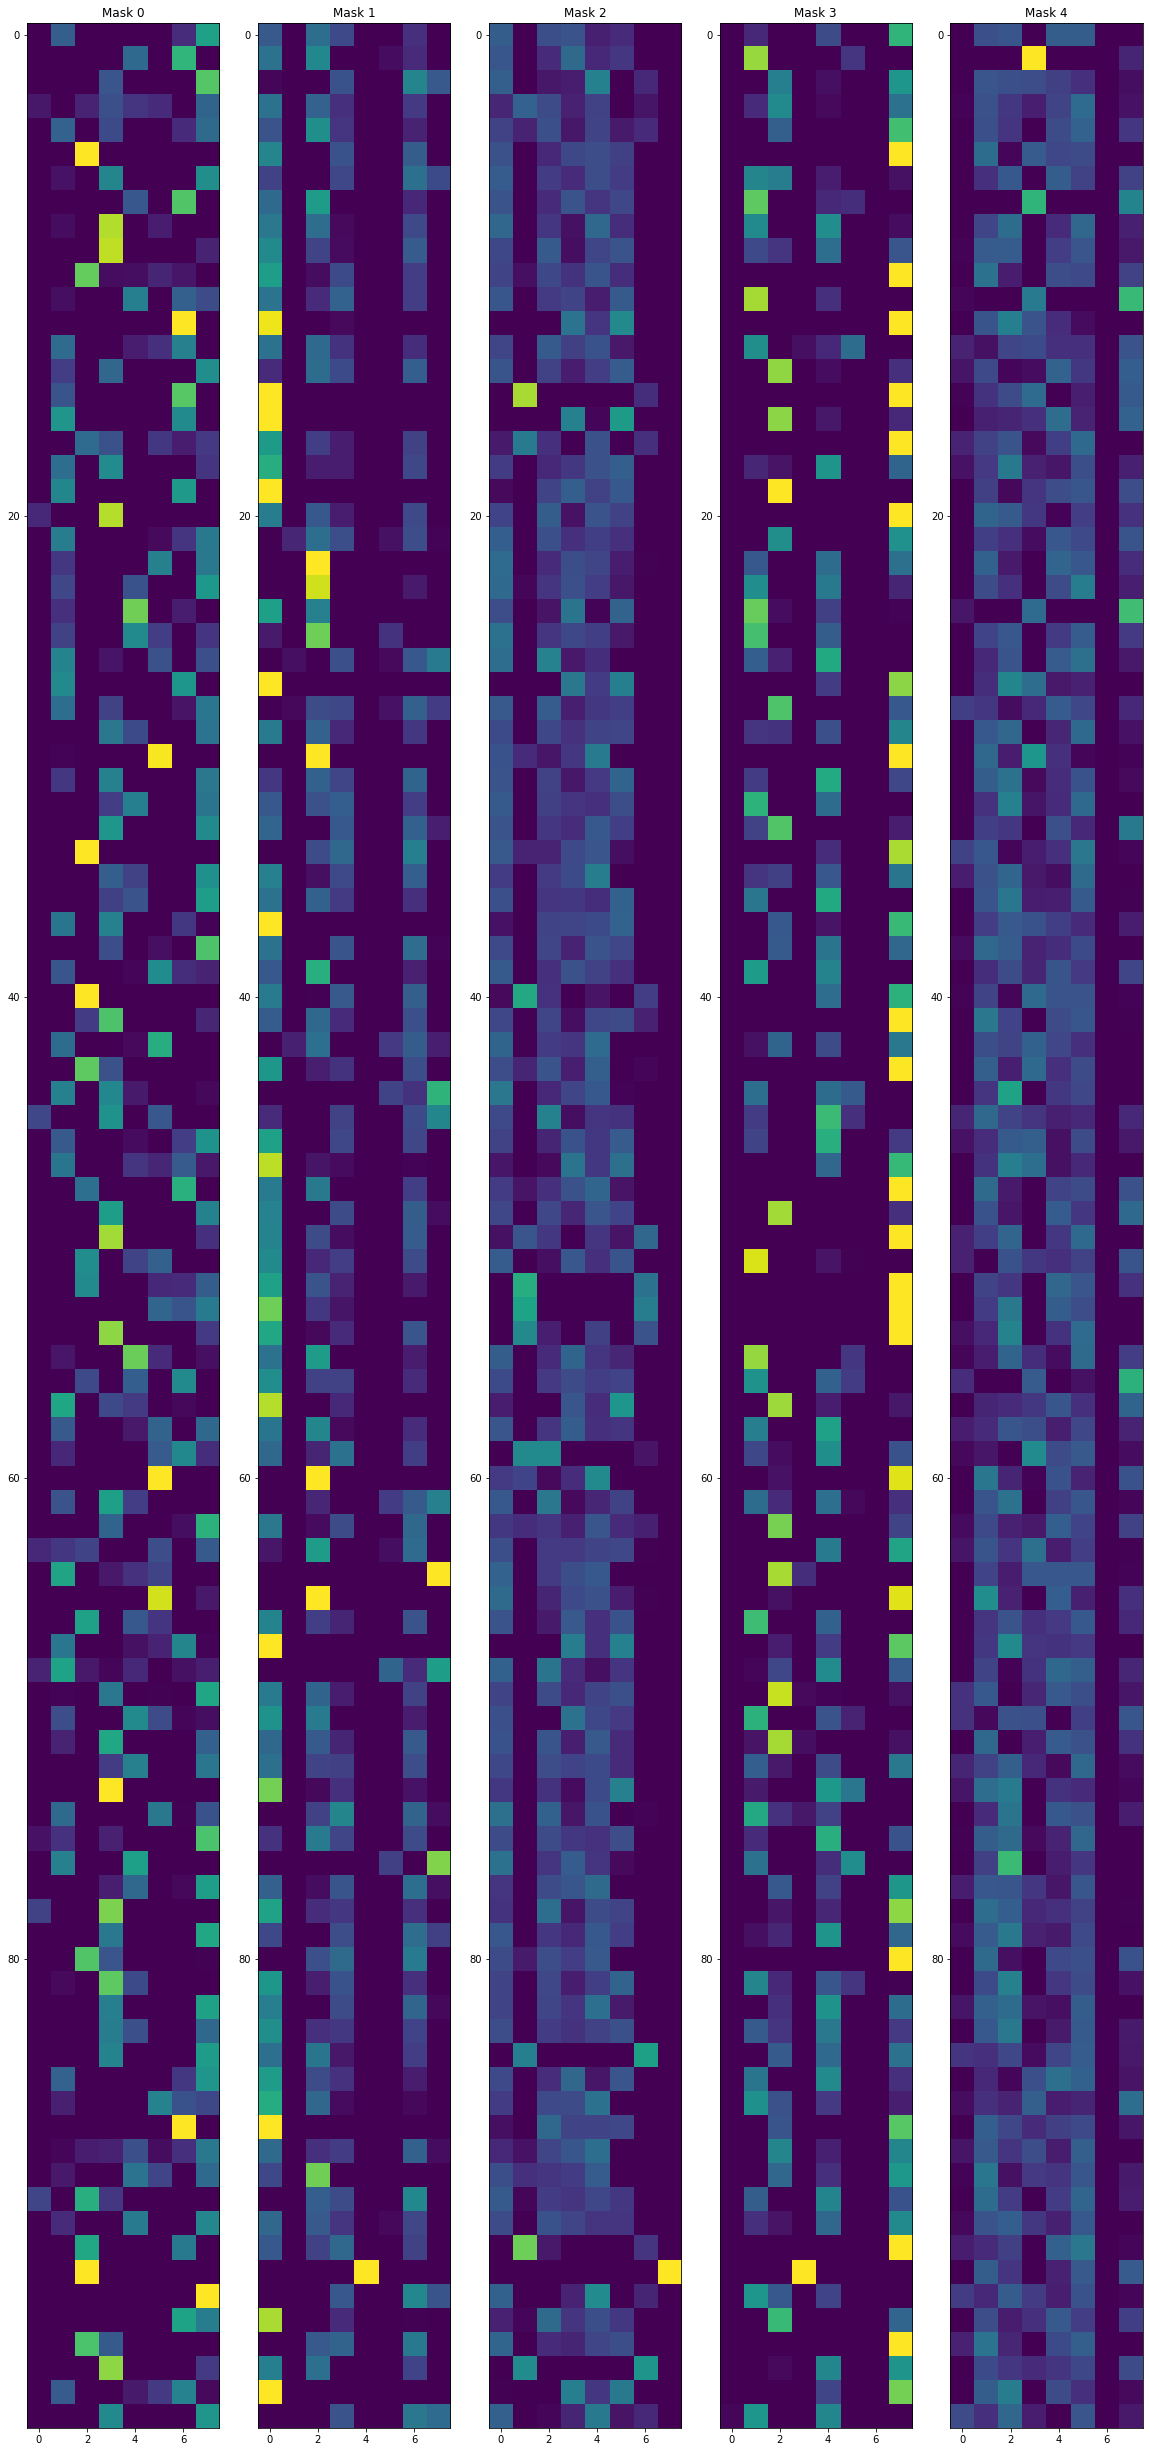

In [ ]:
fig, axs = plt.subplots(1,5, figsize=(20,60))

for i in range (5):
  axs[i].imshow(masks[i][:100])
  axs[i].set_title(f"Mask {i}")

In [ ]:
explain_matrix

array([[ 7.00879812,  8.58747292, 14.23495674, ..., 10.61420536,
         1.41796565,  4.31654263],
       [ 4.30710983, 20.23546028,  3.04293609, ...,  5.54661703,
         4.08196402,  0.65973419],
       [ 3.27019906,  1.5302062 ,  3.36543465, ...,  0.80017638,
         3.85035944,  6.80538368],
       ...,
       [ 6.13964462,  6.82119513,  9.63371181, ...,  4.52699471,
         2.0797205 ,  1.09555912],
       [ 1.02980614,  4.6771965 ,  5.36812496, ...,  3.54095173,
         0.29320964,  1.03733206],
       [ 2.49350762,  3.045398  ,  5.34573078, ...,  2.35308647,
         0.57880783,  2.84761834]])

**i) Código de serialización y deserialización del modelo para ser usada en la evaluación sobre el dataset de test**

In [ ]:
# save tabnet model
saving_path_name = "/content/Tabnet_Modelo_4_2"
saved_filepath = clf.save_model(saving_path_name)

Successfully saved model at /content/Tabnet_Modelo_4_2.zip


In [ ]:
# define new model with basic parameters and load state dict weights
loaded_clf = TabNetClassifier()
loaded_clf.load_model(saved_filepath)

Device used : cuda
Device used : cuda


In [ ]:
preds_test = loaded_clf.predict_proba(X_test)
test_auc = roc_auc_score(y_score=preds_test[:,1], y_true=y_test)


**Matriz de confusión sobre el dataset de dev y testing**


In [ ]:
data1=PreprocesamientoData4(df_train)
data1.shape

(489725, 9)

In [ ]:
df_train.shape

(583613, 196)

In [ ]:
data1.head(489725)

,0,1,2,3,4,5,6,7,default12
0,7.226679,0.545185,-1.522548,-0.346680,-0.779166,0.897336,0.594568,-1.480581,0
1,-0.993760,-0.882218,2.178940,-1.093326,0.508930,1.662205,0.592249,-0.583765,0
2,-1.352499,-0.154683,-0.197313,-0.748021,-1.325529,-0.457742,1.584103,0.048225,0
3,-2.374587,0.776946,1.181420,-0.074633,-0.714997,-2.218487,0.159718,0.381830,0
4,1.508309,-0.578331,-1.518341,-0.128225,0.234852,1.643651,-0.614033,-1.193790,0
...,...,...,...,...,...,...,...,...,...
489720,1.203722,-0.055142,0.136254,-0.553757,-0.944880,0.514596,-1.372568,-0.048943,0
489721,-0.613254,-0.745579,0.872964,-2.134815,1.659148,-1.353325,-0.916413,0.634708,0
489722,-1.908153,1.533285,-0.531766,1.761504,-0.356194,0.307547,0.039875,-1.148405,0
489723,-3.080677,2.282837,1.147981,1.606806,-0.146554,1.589339,0.104903,-1.128814,0


In [ ]:
data=data1

In [ ]:
r = np.random.RandomState(1)

target = "default12"

if "Set" not in data.columns:
  data["Set"] = r.choice(['test'],p=[1], size = (data.shape[0],))

test_indices = data[data.Set=="test"].index

In [ ]:
print(test_indices.shape)

(489725,)


In [ ]:
nunique = data.nunique()
types = data.dtypes
categorical_columns = []
categorical_dims = {}

for col in data.columns:
  if types[col] == 'object' or nunique[col] < 200:
    print (col, data[col].nunique())
    l_enc= LabelEncoder()
    data[col] = data[col].fillna("VV_likely")
    data[col] = l_enc.fit_transform(data[col].values)
    categorical_columns.append(col)
    categorical_dims[col] = len(l_enc.classes_)
  else:
    data.fillna(0,inplace=True)

default12 2
Set 1


In [ ]:
unused_feat = ['Set']

features = [col for col in data.columns if col not in unused_feat+[target]]
cat_idxs = [i for i, f in enumerate(features) if f in categorical_columns]
cat_dims = [categorical_dims[f] for i, f in enumerate(features) if f in categorical_columns]

In [ ]:
print(f"Used features: {features}")
print("-------")
print(f"Categorical features indices: {cat_idxs}")
print("-------")
print(f"Number of modalities per categorical feature: {cat_dims}")

Used features: [0, 1, 2, 3, 4, 5, 6, 7]
-------
Categorical features indices: []
-------
Number of modalities per categorical feature: []


In [ ]:
X_test_t = data[features].values[test_indices]
y_test_t = data[target].values[test_indices]

In [ ]:
print(X_test_t.shape)

(489725, 8)


In [ ]:
preds_test = clf.predict_proba(X_test_t)
test_auc = roc_auc_score(y_score=preds_test[:,1], y_true = y_test_t)
# print(f"Final test score for: {test_auc}")

In [ ]:
preds_test.shape

(489725, 2)

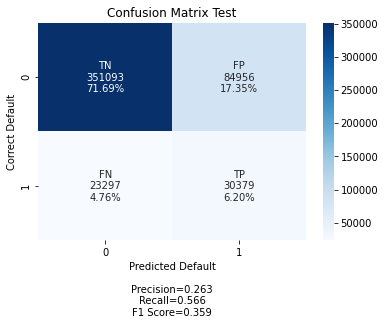

In [ ]:
from sklearn.metrics import confusion_matrix

umbral = 0.515555
y_pred_test =  preds_test[:,1]> umbral
cf_matrix_test = confusion_matrix(y_true=y_test_t,y_pred=y_pred_test)

labels = ['TN','FP','FN','TP']
categories = ['0', '1']
make_confusion_matrix(cf_matrix_test, 
                      group_names=labels,
                      label = "Default",
                      categories=categories, 
                      cmap='Blues',
                      title = "Confusion Matrix Test")

In [ ]:
#ROC CURVE
def curva_f1(y_true, y_pred):
    # calculate roc curves
    precision, recall, thresholds = precision_recall_curve(y_true, y_pred)
    # convert to f score
    fscore = (2 * precision * recall) / (precision + recall)
    # locate the index of the largest f score
    ix = np.argmax(fscore)
    print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
    # plot the roc curve for the model
    no_skill = len(y_true[y_true==1]) / len(y_true)
    plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
    plt.plot(recall, precision, marker='.', label='ANN')
    plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
    # axis labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.show()

Best Threshold=0.572920, F-Score=0.362


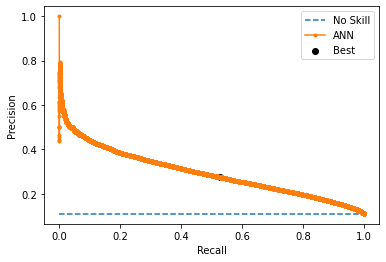

In [ ]:
curva_f1(y_true=y_test_t,y_pred=preds_test[:,1])

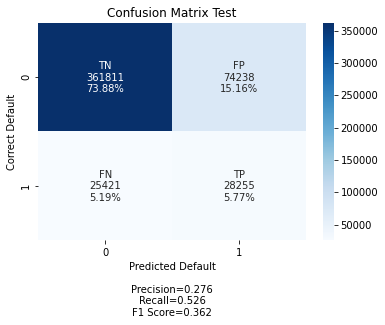

In [ ]:
from sklearn.metrics import confusion_matrix

umbral = 0.572920
y_pred_test =  preds_test[:,1]> umbral
cf_matrix_test = confusion_matrix(y_true=y_test_t,y_pred=y_pred_test)

labels = ['TN','FP','FN','TP']
categories = ['0', '1']
make_confusion_matrix(cf_matrix_test, 
                      group_names=labels,
                      label = "Default",
                      categories=categories, 
                      cmap='Blues',
                      title = "Confusion Matrix Test")

##### RECOMENDACIÓN SOBRE EL DATASET (3):

1. Quitar los límites superiores o inferiores que se han colocado en diversas variables al momento de recolectar el dataset, ya que esto hace que la verdadera distribución de la variable sea modificada.

2. Implementar filtros en los aplicativos de recojo de datos con el fin de asegurar que todos los campos de la base de datos sean llenados de manera correcta y obligatoria para evitar hacer una sustitución de ese valor Null por un número representativo de la data.

3. Implementar un análisis más profundo de las variables del dataset, con el fin de obtener una mejor distribución y correlación entre ellas, de esa manera, las probabilidades de obtener un buen modelo son mayores


EXPERIMENTOS FUTUROS (3):

1. Probar modelos con arquitecturas híbridas que utilizen clustering para la seleccion de caracteristicas, a modo de ejmplo, se propone utilizar un modelo que combine Redes neuronales y arboles de desicion como Random Forest.

2. Respecto al procesamiento de la data, se propone utilizar robust variational autoencoders, que permite detectar anomalías en la data.

3. Utiliza undersampling (proceso opuesto al oversampling, utilizado en el trabajo)


